In [4]:
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path


wpd_dir = "/n/work3/fujita/research/NeuralBF-IROS2022/experiments/finetune_mask-based-wpd_doa-aware-lstm_fastmnmf-doaest_LibriMixDemandTest/"
fastmnmf_dir = "/n/work3/fujita/research/NeuralBF-IROS2022/experiments/fastmnmf_LibriMixDemandTest/"

dirs_fastmnmf = [p for p in Path(fastmnmf_dir).glob("**/metrics.csv")]
dirs_none = [p for p in Path(wpd_dir).glob("**/metrics.csv") if re.search("None", str(p))]
dirs_finetune = [p for p in Path(wpd_dir).glob("**/metrics.csv") if not re.search("None", str(p))]

df = pd.DataFrame()

# for path in dirs_fastmnmf:
#     csv = pd.read_csv(path)
#     df = pd.concat((df, pd.DataFrame({
#         "n_spks": [int(str(path).split("n_spks=")[1].split("_")[0])],
#         "room_size": [str(path).split("room_size=")[1].split("_")[0]],
#         "rt60": [float(str(path).split("rt60=")[1].split("_")[0])],
#         "SNR": [float(str(path).split("noise-snr=")[1].split("_")[0])],
#         "src_distance": [float(str(path).split("src-distance=")[1].split("_")[0])],
#         "total_s": [-1],
#         "WER": [csv.iloc[0]["test_WER"].item()],
#         "SI-SDR": [csv.iloc[0]["test_SI-SDR"].item()],
#         "STOI": [csv.iloc[0]["test_STOI"].item()],
#         "PESQ": [csv.iloc[0]["test_PESQ"].item()],
#         "SRMR": [csv.iloc[0]["test_SRMR"].item()]
#     })))

for path in dirs_none:
    csv = pd.read_csv(path)
    try:
        df = pd.concat((df, pd.DataFrame({
            "n_spks": [int(str(path).split("n_spks=")[1].split("_")[0])],
            # "room_size": [str(path).split("room_size=")[1].split("_")[0]],
            "rt60": [float(str(path).split("rt60=")[1].split("_")[0])],
            "SNR": [float(str(path).split("noise-snr=")[1].split("_")[0])],
            # "src_distance": [float(str(path).split("src-distance=")[1].split("_")[0])],
            "total_s": [0],
            "id": [int(str(path).split("id=")[1].split("/")[0])],
            "WER": [csv.iloc[0]["test_WER"].item()],
            "SI-SDR": [csv.iloc[0]["test_SI-SDR"].item()],
            "STOI": [csv.iloc[0]["test_STOI"].item()],
            "PESQ": [csv.iloc[0]["test_PESQ"].item()],
            "SRMR": [csv.iloc[0]["test_SRMR"].item()]
        })))
    except:
        continue

for path in dirs_finetune:
    csv = pd.read_csv(path)
    try:
        df = pd.concat((df, pd.DataFrame({
            "n_spks": [int(str(path).split("n_spks=")[1].split("_")[0])],
            # "room_size": [str(path).split("room_size=")[1].split("_")[0]],
            "rt60": [float(str(path).split("rt60=")[1].split("_")[0])],
            "SNR": [float(str(path).split("noise-snr=")[1].split("_")[0])],
            # "src_distance": [float(str(path).split("src-distance=")[1].split("_")[0])],
            "total_s": [int(str(path).split("total_s=")[1].split("_")[0])],
            "id": [int(str(path).split("id=")[1].split("/")[0])],
            "WER": [csv[csv.epoch==1]["test_WER"].item()],
            "SI-SDR": [csv[csv.epoch==1]["test_SI-SDR"].item()],
            "STOI": [csv[csv.epoch==1]["test_STOI"].item()],
            "PESQ": [csv[csv.epoch==1]["test_PESQ"].item()],
            "SRMR": [csv[csv.epoch==1]["test_SRMR"].item()]
        })))
    except:
        continue

df = df.groupby(["n_spks", "rt60", "SNR", "total_s"]).mean().reset_index()
df

,n_spks,rt60,SNR,total_s,id,WER,SI-SDR,STOI,PESQ,SRMR
0,2,0.5,-5.0,0,6.400000,0.554386,-20.833042,0.649907,1.350589,5.591540
1,2,0.5,-5.0,30,6.777778,0.556835,-19.788114,0.658625,1.335889,6.502172
2,2,0.5,-5.0,60,6.777778,0.630327,-20.558295,0.645334,1.299381,6.658173
3,2,0.5,-5.0,120,6.400000,0.571220,-22.840078,0.647027,1.290554,5.934243
4,2,0.5,-5.0,240,6.400000,0.638233,-23.569982,0.615773,1.268145,6.118466
5,2,0.5,5.0,0,6.400000,0.184832,-18.398219,0.776749,1.676375,6.668440
6,2,0.5,5.0,30,6.777778,0.183754,-17.526343,0.781574,1.700649,7.130644
7,2,0.5,5.0,60,6.400000,0.206530,-18.392350,0.773644,1.658387,6.610972
8,2,0.5,5.0,120,6.400000,0.234844,-18.830677,0.768551,1.619076,6.760323
9,2,0.5,5.0,240,6.400000,0.355287,-19.538796,0.727437,1.579218,7.605400


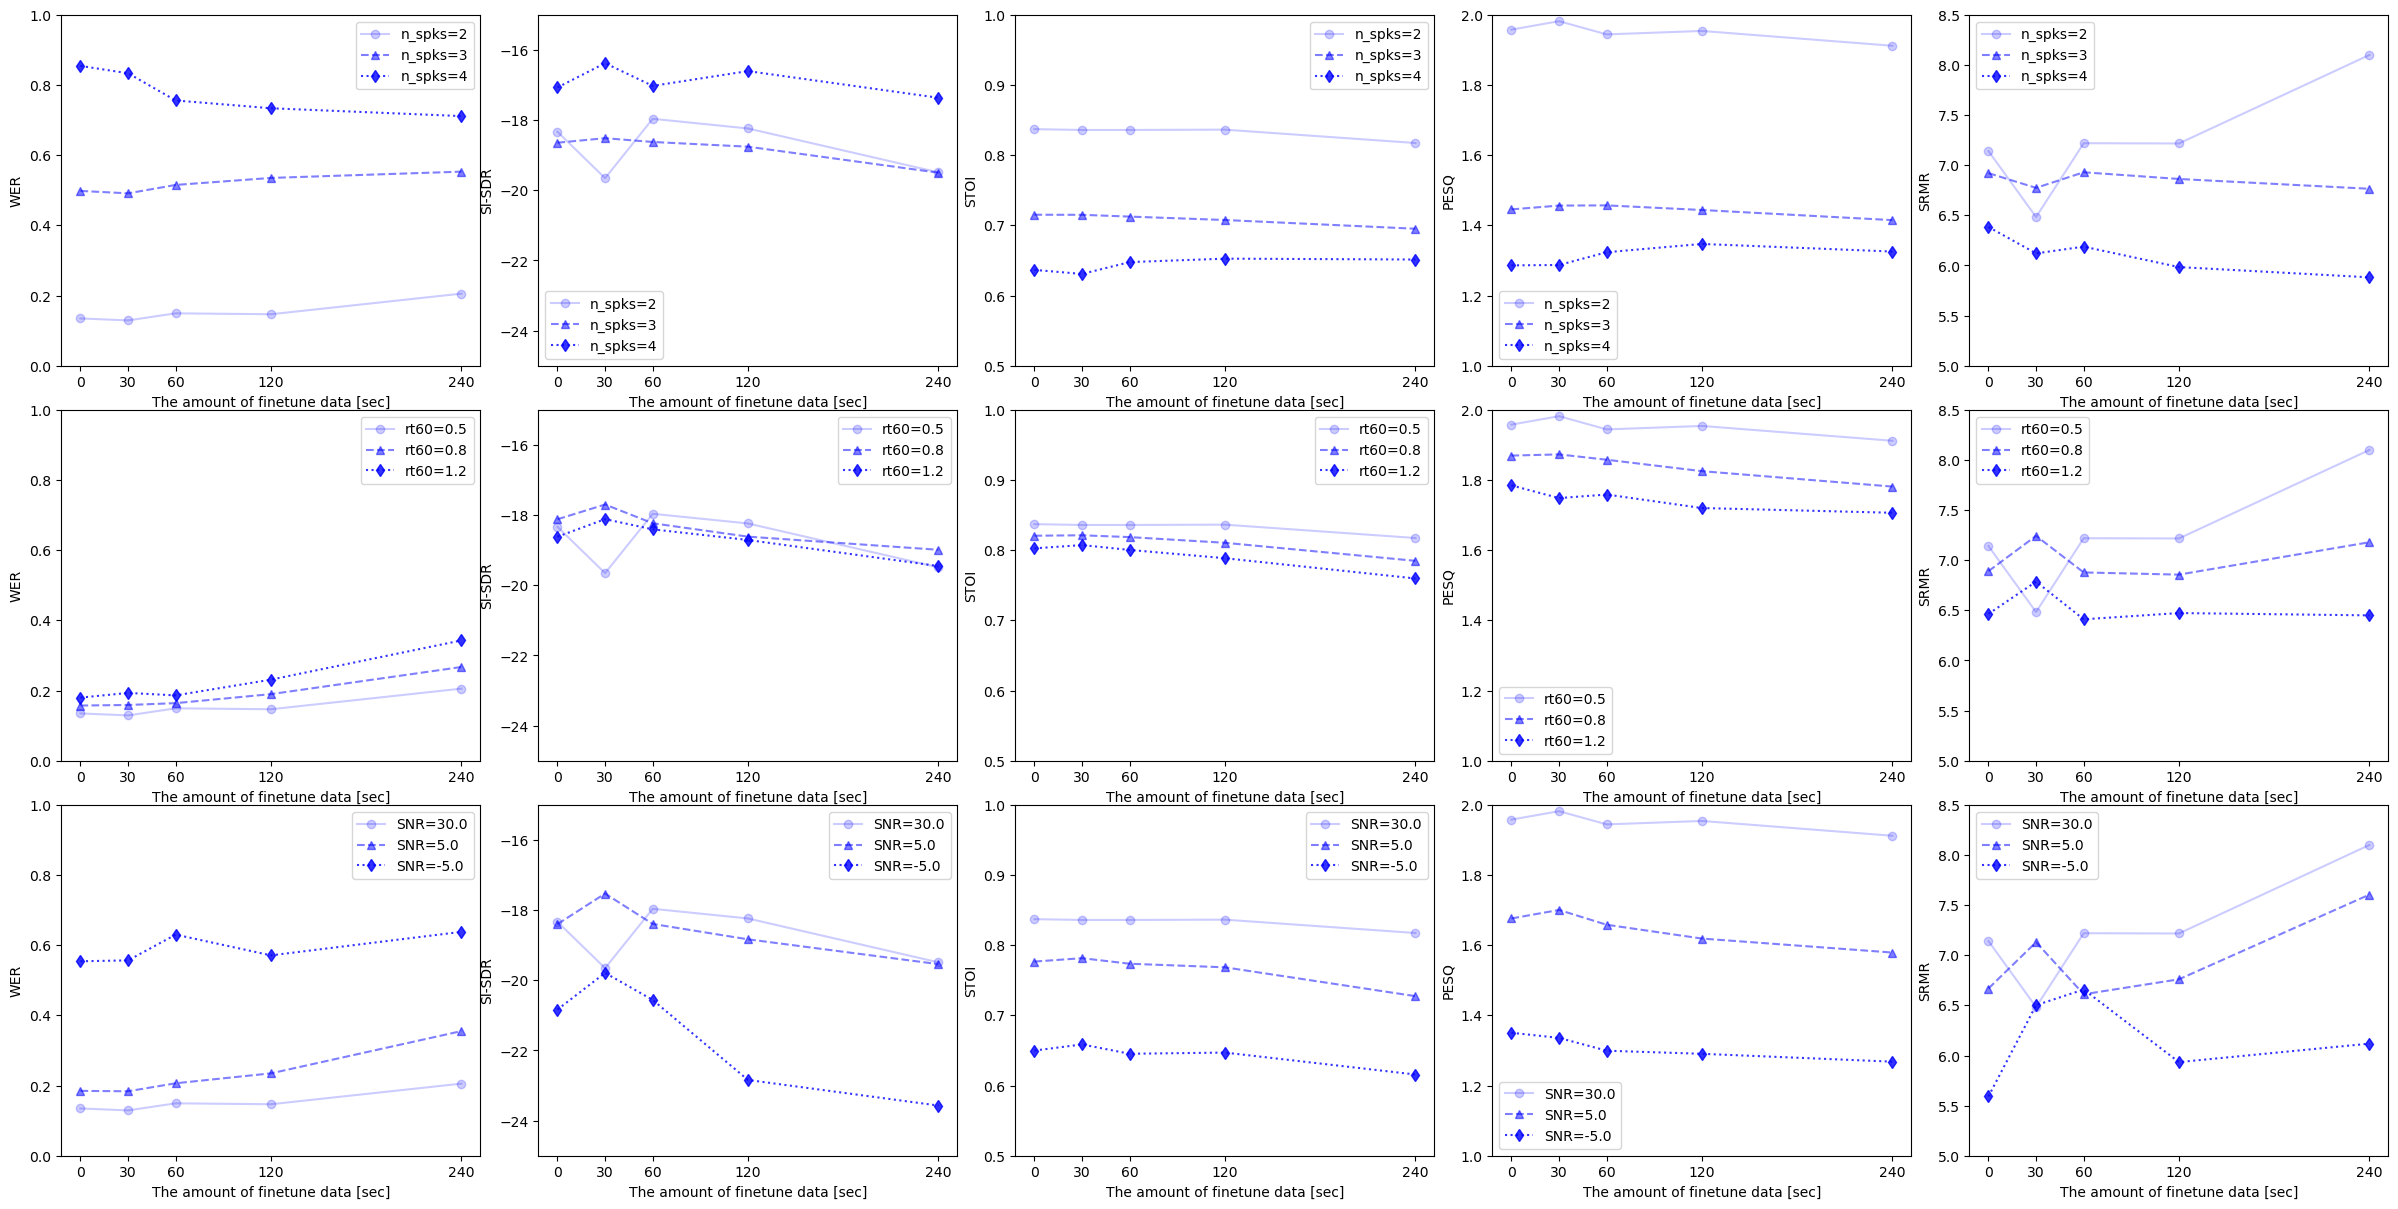

In [7]:
def plot_row(ax, df, var="n_spks", domain=[2, 3, 4]):
    x = [0, 30, 60, 120, 240]
    ax[0].plot(x, df[df[var]==domain[0]]["WER"],  color=(0, 0, 1, 0.2), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[0].plot(x, df[df[var]==domain[1]]["WER"],  color=(0, 0, 1, 0.5), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[0].plot(x, df[df[var]==domain[2]]["WER"],  color=(0, 0, 1, 0.8), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[0].set_ylim(0, 1)
    ax[0].set_xlabel('The amount of finetune data [sec]')
    ax[0].set_ylabel('WER')
    ax[0].set_xticks(x)
    ax[0].legend()
    ax[1].plot(x, df[df[var]==domain[0]]["SI-SDR"],  color=(0, 0, 1, 0.2), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[1].plot(x, df[df[var]==domain[1]]["SI-SDR"],  color=(0, 0, 1, 0.5), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[1].plot(x, df[df[var]==domain[2]]["SI-SDR"],  color=(0, 0, 1, 0.8), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[1].set_ylim(-25, -15)
    ax[1].set_xlabel('The amount of finetune data [sec]')
    ax[1].set_ylabel('SI-SDR')
    ax[1].set_xticks(x)
    ax[1].legend()
    ax[2].plot(x, df[df[var]==domain[0]]["STOI"],  color=(0, 0, 1, 0.2), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[2].plot(x, df[df[var]==domain[1]]["STOI"],  color=(0, 0, 1, 0.5), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[2].plot(x, df[df[var]==domain[2]]["STOI"],  color=(0, 0, 1, 0.8), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[2].set_ylim(0.5, 1)
    ax[2].set_xlabel('The amount of finetune data [sec]')
    ax[2].set_ylabel('STOI')
    ax[2].set_xticks(x)
    ax[2].legend()
    ax[3].plot(x, df[df[var]==domain[0]]["PESQ"],  color=(0, 0, 1, 0.2), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[3].plot(x, df[df[var]==domain[1]]["PESQ"],  color=(0, 0, 1, 0.5), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[3].plot(x, df[df[var]==domain[2]]["PESQ"],  color=(0, 0, 1, 0.8), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[3].set_ylim(1, 2)
    ax[3].set_xlabel('The amount of finetune data [sec]')
    ax[3].set_ylabel('PESQ')
    ax[3].set_xticks(x)
    ax[3].legend()
    ax[4].plot(x, df[df[var]==domain[0]]["SRMR"],  color=(0, 0, 1, 0.2), marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[4].plot(x, df[df[var]==domain[1]]["SRMR"],  color=(0, 0, 1, 0.5), marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[4].plot(x, df[df[var]==domain[2]]["SRMR"],  color=(0, 0, 1, 0.8), marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[4].set_ylim(5, 8.5)
    ax[4].set_xlabel('The amount of finetune data [sec]')
    ax[4].set_ylabel('SRMR')
    ax[4].set_xticks(x)
    ax[4].legend()

fig, ax = plt.subplots(3, 5, figsize=(24, 12))
# fig.suptitle("Adaptation result based on matching between target DOA and separated signal", size=25)
# fig.suptitle("Adaptation result based on filtering and localization of separated signals", size=25)
# fig.suptitle("Adaptation result based on distance between the WPD prediction and separated speeches", size=25)
fig.tight_layout()

default = pd.Series(df.n_spks==2) & pd.Series(df.rt60==0.5) & pd.Series(df.SNR==30.0)
plot_row(ax[0], df[default | pd.Series(df.n_spks==3) | pd.Series(df.n_spks==4)], var="n_spks", domain=[2, 3, 4])
plot_row(ax[1], df[default | pd.Series(df.rt60==0.8) | pd.Series(df.rt60==1.2)], var="rt60", domain=[0.5, 0.8, 1.2])
plot_row(ax[2], df[default | pd.Series(df.SNR==5.0) | pd.Series(df.SNR==-5.0)], var="SNR", domain=[30.0, 5.0, -5.0])

In [8]:
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42

fig.savefig("adaptation_result.pdf")

In [25]:
def plot_row(ax, df, var="n_spks", domain=[2, 3, 4], print_fastmnmf=False):
    x = [0, 30, 60, 120, 240]
    ax[0].plot(x, df[df[var]==domain[0]].iloc[1:]["WER"],  color="r", marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[0].plot(x, df[df[var]==domain[1]].iloc[1:]["WER"],  color="g", marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[0].plot(x, df[df[var]==domain[2]].iloc[1:]["WER"],  color="b", marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[0].set_xlabel('The amount of finetune data [sec]')
    ax[0].set_ylabel('WER')
    ax[0].set_xticks(x)
    ax[0].legend()
    ax[1].plot(x, df[df[var]==domain[0]].iloc[1:]["SI-SDR"],  color="r", marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[1].plot(x, df[df[var]==domain[1]].iloc[1:]["SI-SDR"],  color="g", marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[1].plot(x, df[df[var]==domain[2]].iloc[1:]["SI-SDR"],  color="b", marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[1].set_xlabel('The amount of finetune data [sec]')
    ax[1].set_ylabel('SI-SDR')
    ax[1].set_xticks(x)
    ax[1].legend()
    ax[2].plot(x, df[df[var]==domain[0]].iloc[1:]["STOI"],  color="r", marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[2].plot(x, df[df[var]==domain[1]].iloc[1:]["STOI"],  color="g", marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[2].plot(x, df[df[var]==domain[2]].iloc[1:]["STOI"],  color="b", marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[2].set_xlabel('The amount of finetune data [sec]')
    ax[2].set_ylabel('STOI')
    ax[2].set_xticks(x)
    ax[2].legend()
    ax[3].plot(x, df[df[var]==domain[0]].iloc[1:]["PESQ"],  color="r", marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[3].plot(x, df[df[var]==domain[1]].iloc[1:]["PESQ"],  color="g", marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[3].plot(x, df[df[var]==domain[2]].iloc[1:]["PESQ"],  color="b", marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[3].set_xlabel('The amount of finetune data [sec]')
    ax[3].set_ylabel('PESQ')
    ax[3].set_xticks(x)
    ax[3].legend()
    ax[4].plot(x, df[df[var]==domain[0]].iloc[1:]["SRMR"],  color="r", marker="o", linestyle="-", label=f"{var}={domain[0]}")
    ax[4].plot(x, df[df[var]==domain[1]].iloc[1:]["SRMR"],  color="g", marker="^", linestyle="--", label=f"{var}={domain[1]}")
    ax[4].plot(x, df[df[var]==domain[2]].iloc[1:]["SRMR"],  color="b", marker="d", linestyle=":", label=f"{var}={domain[2]}")
    ax[4].set_xlabel('The amount of finetune data [sec]')
    ax[4].set_ylabel('SRMR')
    ax[4].set_xticks(x)
    ax[4].legend()

    if print_fastmnmf:
        ax[0].axhline(y=df[df[var]==domain[0]].iloc[0]["WER"], color="r", linestyle="-", linewidth=1)
        ax[0].axhline(y=df[df[var]==domain[1]].iloc[0]["WER"], color="g", linestyle="--", linewidth=1)
        ax[0].axhline(y=df[df[var]==domain[2]].iloc[0]["WER"], color="b", linestyle=":", linewidth=1)
        ax[1].axhline(y=df[df[var]==domain[0]].iloc[0]["SI-SDR"], color="r", linestyle="-", linewidth=1)
        ax[1].axhline(y=df[df[var]==domain[1]].iloc[0]["SI-SDR"], color="g", linestyle="--", linewidth=1)
        ax[1].axhline(y=df[df[var]==domain[2]].iloc[0]["SI-SDR"], color="b", linestyle=":", linewidth=1)
        ax[2].axhline(y=df[df[var]==domain[0]].iloc[0]["STOI"], color="r", linestyle="-", linewidth=1)
        ax[2].axhline(y=df[df[var]==domain[1]].iloc[0]["STOI"], color="g", linestyle="--", linewidth=1)
        ax[2].axhline(y=df[df[var]==domain[2]].iloc[0]["STOI"], color="b", linestyle=":", linewidth=1)
        ax[3].axhline(y=df[df[var]==domain[0]].iloc[0]["PESQ"], color="r", linestyle="-", linewidth=1)
        ax[3].axhline(y=df[df[var]==domain[1]].iloc[0]["PESQ"], color="g", linestyle="--", linewidth=1)
        ax[3].axhline(y=df[df[var]==domain[2]].iloc[0]["PESQ"], color="b", linestyle=":", linewidth=1)
        ax[4].axhline(y=df[df[var]==domain[0]].iloc[0]["SRMR"], color="r", linestyle="-", linewidth=1)
        ax[4].axhline(y=df[df[var]==domain[1]].iloc[0]["SRMR"], color="g", linestyle="--", linewidth=1)
        ax[4].axhline(y=df[df[var]==domain[2]].iloc[0]["SRMR"], color="b", linestyle=":", linewidth=1)


fig, ax = plt.subplots(5, 5, figsize=(24, 16))
default = pd.Series(df.n_spks==2) & pd.Series(df.room_size=="large") & pd.Series(df.rt60==0.5) & pd.Series(df.SNR==30.0) & pd.Series(df.src_distance==1.5)
default = pd.Series(df.n_spks==2) & pd.Series(df.rt60==0.5) & pd.Series(df.SNR==30.0)

print_fastmnmf = False
plot_row(ax[0], df[default | pd.Series(df.n_spks==3) | pd.Series(df.n_spks==4)], var="n_spks", domain=[2, 3, 4], print_fastmnmf=print_fastmnmf)
plot_row(ax[1], df[default | pd.Series(df.rt60==0.8) | pd.Series(df.rt60==1.2)], var="rt60", domain=[0.5, 0.8, 1.2], print_fastmnmf=print_fastmnmf)
plot_row(ax[2], df[default | pd.Series(df.SNR==5.0) | pd.Series(df.SNR==-5.0)], var="SNR", domain=[30.0, 5.0, -5.0], print_fastmnmf=print_fastmnmf)
plot_row(ax[3], df[default | pd.Series(df.room_size=="middle") | pd.Series(df.room_size=="small")], var="room_size", domain=["large", "middle", "small"], print_fastmnmf=print_fastmnmf)
plot_row(ax[4], df[default | pd.Series(df.src_distance==0.5) | pd.Series(df.src_distance==3.0)], var="src_distance", domain=[1.5, 0.5, 3.0], print_fastmnmf=print_fastmnmf)

((2, 0.5, -5.0, 0),
 id         6.400000
 WER        0.554386
 SI-SDR   -20.833042
 STOI       0.649907
 PESQ       1.350589
 SRMR       5.591540
 Name: (2, 0.5, -5.0, 0), dtype: float64)

In [41]:
df[default]

,n_spks,rt60,SNR,total_s,id,WER,SI-SDR,STOI,PESQ,SRMR
10,2,0.5,30.0,0,6.4,0.140315,-17.795586,0.837786,1.945017,7.393181
11,2,0.5,30.0,30,6.4,0.136467,-18.000639,0.837490,1.965301,7.235713
12,2,0.5,30.0,60,6.4,0.142397,-18.160217,0.833022,1.941687,7.433696
13,2,0.5,30.0,120,6.4,0.158737,-18.410040,0.826830,1.898516,7.156911
14,2,0.5,30.0,240,6.4,0.342074,-20.150018,0.768845,1.721792,6.927223
